In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [8]:
class Perceptron:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0

        for _ in range(self.epochs):
            for xi, yi in zip(X, y):
                linear_output = np.dot(xi, self.w) + self.b
                y_pred = 1 if linear_output >= 0 else 0
                update = self.lr * (yi - y_pred)
                self.w += update * xi
                self.b += update

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.where(linear_output >= 0, 1, 0)


In [9]:
iris = load_iris()
X = iris.data[:100, :2]   # only 2 classes + 2 features
y = iris.target[:100]


In [10]:
model = Perceptron(lr=0.01, epochs=1000)
model.fit(X, y)

preds = model.predict(X)
accuracy = np.mean(preds == y)
accuracy


np.float64(1.0)

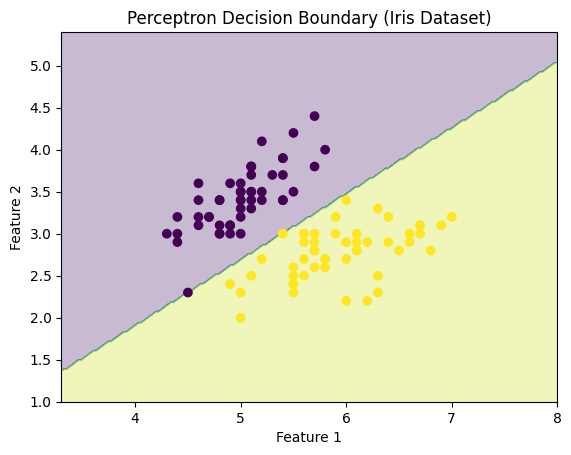

In [14]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron Decision Boundary (Iris Dataset)")
plt.show()


In [15]:
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([0,1,1,0])

xor_model = Perceptron(lr=0.1, epochs=1000)
xor_model.fit(X_xor, y_xor)

print("Predictions:", xor_model.predict(X_xor))
print("Actual:", y_xor)


Predictions: [1 1 0 0]
Actual: [0 1 1 0]
